In [ ]:
%load_ext autoreload
%autoreload 2

In [73]:
import pickle
import numpy as np
import networkx as nx
import polars as pl
import pandas as pd

import matplotlib.pyplot as plt
from enso.data import read_noaa

In [83]:
with open("./sample_larger.pkl", "rb") as f:
    s = pickle.load(f)

In [84]:
# Read NINO data
fname = f"./data/nino34/noaa_nino34_anomaly.txt"

df = read_noaa(fname) 

q = (
    df.lazy()
    .melt(id_vars="year")
    .select(
        pl.date(pl.col("year"), pl.col("variable"), 1).alias("date"),
        pl.col("value").alias("nino34")
    )
    .sort(by="date")
    .drop_nulls()
)

tseries = q.collect()

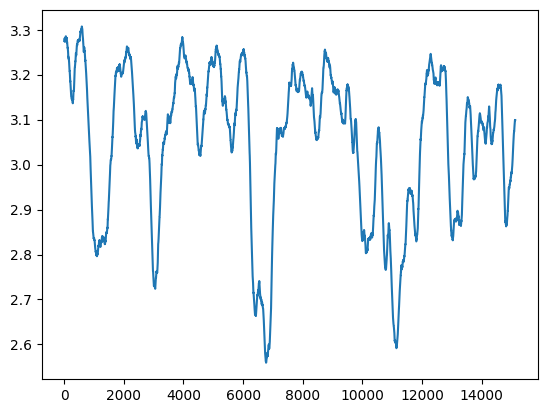

In [86]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(s)), s)

plt.show()

In [87]:
taxis = pd.date_range(start=pd.to_datetime("1979-01-01"), end=pd.to_datetime("2021-12-31"), freq="D")
ind = (taxis.month == 2) & (taxis.day == 29)
taxis = taxis[~ind]
taxis = taxis[-len(s):]


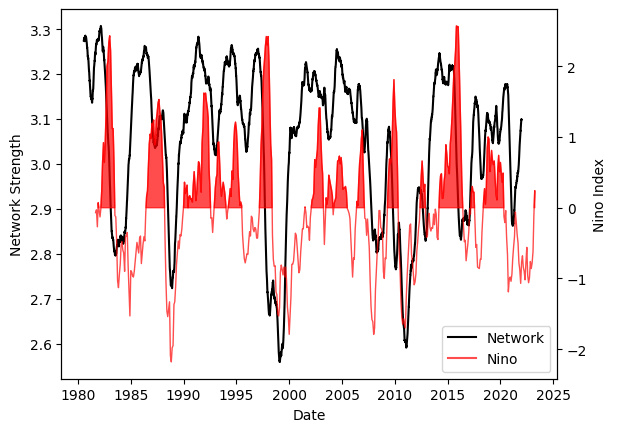

In [88]:
fig, ax = plt.subplots()

ax.plot(taxis, s, color="black", label="Network")
# ax.set_xticks(np.arange(1980, 1979 + len(sizes) // 365, 5))
ax.plot([], [], color="red", alpha=0.7, label="Nino")


axt = ax.twinx()
t = tseries["date"][-500:]
nino = tseries["nino34"][-500:]

axt.plot(t, nino, color="red", label="Nino", alpha=0.7, lw=1)
axt.set_ylabel("Nino Index")
axt.fill_between(t, nino, where=nino > 0.0, color="red", interpolate=True, alpha=0.7)

ax.set_xlabel("Date")
ax.set_ylabel("Network Strength")
ax.legend(loc="lower right")

plt.savefig("enso_network_corrected.pdf", dpi=300)

plt.show()